In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import getpass

user = getpass.getuser()

from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt

/home/nsharma/miniconda3/envs/risingverse/lib/python3.7/site-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
# change file name here for RCP8.5
ssp2 = pd.read_csv("/home/nsharma/repos/labor-code-release-2020/output/damage_function_no_cons/SSP2/damages_nocons.csv") 
ssp3 = pd.read_csv("/home/nsharma/repos/labor-code-release-2020/output/damage_function_no_cons/SSP3/damages_nocons.csv")
ssp2 = ssp2[["discrate","year","pulse","rcp","damages", "variable"]]
ssp3 = ssp3[["discrate","year","pulse","rcp","damages", "variable"]]
ssp2 = ssp2[(ssp2.rcp == "rcp45")]
ssp3 = ssp3[(ssp3.rcp == "rcp45")]

In [3]:
damages = pd.merge(ssp2, ssp3, on= ['discrate', 'year', 'pulse', 'rcp'], how = 'inner')
damages['diff_damages'] = damages.damages_x - damages.damages_y
# damages

In [4]:
damages = pd.merge(ssp2, ssp3, on= ['discrate', 'year', 'pulse', 'rcp'], how = 'inner')
damages['diff_damages'] = damages.damages_x - damages.damages_y
# damages

In [5]:
# generating a list of years where diff damages is negative
years_low = damages.loc[damages.diff_damages < 0].year.unique()
years_low

array([2020., 2021., 2022., 2023., 2024., 2025., 2026.])

In [6]:
# reading the coeffs in SSP2 and SSP3 to obtain damage functions

ssp2_coeffs = pd.read_csv("/home/nsharma/repos/labor-code-release-2020/output/damage_function_no_cons/SSP2/nocons_betas_SSP2.csv")
ssp2_coeffs = ssp2_coeffs[["year", "cons","beta1","beta2"]]

ssp3_coeffs = pd.read_csv("/home/nsharma/repos/labor-code-release-2020/output/damage_function_no_cons/SSP3/nocons_betas_SSP3.csv")
ssp3_coeffs = ssp3_coeffs[["year", "cons","beta1","beta2"]]

In [7]:
# ANALYSIS FOR RCP4.5

coeffs = pd.merge(ssp2_coeffs, ssp3_coeffs, on= ['year'], how = 'inner') 
# coeffs = coeffs[coeffs['year'].isin(years_low)] # uncomment if comparison wanted only for years where SSP2 damages < SSP3 damages

fair = pd.read_csv("/mnt/CIL_labor/6_ce/rcp45_anomalies.csv")

df = pd.merge(coeffs, fair, on= ['year'], how = 'inner')

# generate SSP2 variables: damages due to pulse and level at rcp anomaly 
df['pulse_df_ssp2'] = (df.cons_x + df.fair_temperatures_anomaly_pulse * df.beta1_x + df.fair_temperatures_anomaly_pulse**2 * df.beta2_x)
df['level_ssp2'] = (df.cons_x + df.fair_temperatures_anomaly_rcp * df.beta1_x + df.fair_temperatures_anomaly_rcp**2 * df.beta2_x)
df['ssp2_damages'] = df.pulse_df_ssp2 - df.level_ssp2

# generate SSP3 variables: damages due to pulse and level at rcp anomaly 
df['pulse_df_ssp3'] = (df.cons_y + df.fair_temperatures_anomaly_pulse * df.beta1_y + df.fair_temperatures_anomaly_pulse**2 * df.beta2_y)
df['level_ssp3'] = (df.cons_y + df.fair_temperatures_anomaly_rcp * df.beta1_y + df.fair_temperatures_anomaly_rcp**2 * df.beta2_y)
df['ssp3_damages'] = df.pulse_df_ssp3 - df.level_ssp3

# diff between SSP3 and SSP3 damages
df['diff'] = df.ssp2_damages - df.ssp3_damages

# slope = beta1 + 2*beta2*fair_anomaly for each case for rcp anomaly
df['slope_ssp2'] = (df.beta1_x + 2 * df.fair_temperatures_anomaly_rcp * df.beta2_x)
df['slope_ssp3'] = (df.beta1_y + 2 * df.fair_temperatures_anomaly_rcp * df.beta2_y)

# final df
df[['year', 'ssp2_damages', 'ssp3_damages', 'fair_temperatures_anomaly_rcp', 'diff', 'level_ssp2', 'level_ssp3', 'slope_ssp2', 'slope_ssp3']]#.to_csv('/home/nsharma/repos/labor-code-release-2020/output/damage_function_no_cons/rcp45_df.csv')

# dff[dff['year'].isin(years_low)]



,year,ssp2_damages,ssp3_damages,fair_temperatures_anomaly_rcp,diff,level_ssp2,level_ssp3,slope_ssp2,slope_ssp3
0,2020,0.000009,0.000010,0.218159,-8.054532e-07,0.012043,0.011379,0.015558,0.016890
1,2021,0.000030,0.000032,0.240173,-1.640598e-06,0.014302,0.013048,0.031010,0.032648
2,2022,0.000046,0.000048,0.267228,-1.644422e-06,0.021334,0.020306,0.037441,0.038750
3,2023,0.000064,0.000070,0.295880,-5.721886e-06,0.027454,0.025429,0.046400,0.050455
4,2024,0.000091,0.000095,0.323962,-3.853521e-06,0.034473,0.032223,0.061314,0.063848
...,...,...,...,...,...,...,...,...,...
276,2296,0.041010,0.003719,1.932909,3.729121e-02,29.422319,2.586018,26.367294,2.390840
277,2297,0.041776,0.003751,1.941433,3.802494e-02,30.075919,2.618045,26.848048,2.410817
278,2298,0.042530,0.003782,1.948534,3.874834e-02,30.704259,2.646930,27.320311,2.429361
279,2299,0.043224,0.003806,1.951856,3.941783e-02,31.240107,2.666832,27.755116,2.443849


In [8]:
len(df.loc[df.level_ssp2 < df.level_ssp3].year.unique())
df.loc[df.level_ssp2 < df.level_ssp3].year.unique()

array([], dtype=int64)

In [9]:
# generating df of anomalies between -5 to 20 in 1101 steps for each year between 2015 to 2100
temp_range = np.linspace(0.25, 4.25, 17)
idx = product(range(2015,2301), temp_range) 
temps = np.stack([temp_range for _ in range(2015,2301)]).flatten() 
temps = pd.DataFrame(temps, index=[i for i,x in idx], columns=['temp'])
temps = temps.reset_index().rename(columns={"index":"year"})
# temps # checking things out

In [10]:
# SSP2 damage function
ssp2_df = pd.merge(ssp2_coeffs, temps, on= ['year'], how = 'inner') 
ssp2_df['ssp2_df_T'] = (ssp2_df.cons + ssp2_df.temp * ssp2_df.beta1 + ssp2_df.temp**2 * ssp2_df.beta2)
# ssp2_df # checking things out

# SSP3 cloud labor mc damage function
ssp3_df = pd.merge(ssp3_coeffs, temps, on= ['year'], how = 'inner')
ssp3_df['ssp3_df_T'] = (ssp3_df.cons + ssp3_df.temp * ssp3_df.beta1 + ssp3_df.temp**2 * ssp3_df.beta2)
# mc_sm_df # checking things out

In [11]:
# overlaid grid plot of all years where ssp2_df_T < ssp3_df_T as per the SCC calculation

# comparison of smooth anomalies: SSP2 and SSP3
df1 = pd.merge(ssp2_df, ssp3_df, on = ['year', 'temp'], how = 'outer')
df1 = df1[df1['year'].isin(years_low)]
# df1.to_csv('/home/nsharma/repos/labor-code-release-2020/output/damage_function_no_cons/dfs_low_years.csv')

# generating years from 2020 to 2100 at every ten years
years = list(range(2020, 2301, 10))

# comparison of SSP2 and SSP3 damage functions
df2 = pd.merge(ssp2_df, ssp3_df, on = ['year', 'temp'], how = 'outer')
df2 = df2[df2['year'].isin(years)]




In [13]:
# # grid plot of SSP3 vs SSP2 in years where discounted SSP2 damages < SSP3 damages under RCP4.5 
# g = sns.FacetGrid(df1, col="year", col_wrap=7, sharey=True)
# g.map_dataframe(sns.lineplot, x='temp', y='ssp2_df_T', color = "blue", label="SSP2 damage function").map_dataframe(sns.lineplot, x='temp', y='ssp3_df_T', color = "red", label="SSP3 damage function")
# lgd = plt.legend(bbox_to_anchor=(-2,9.5), ncol=2)
# # plt.savefig('/home/nsharma/repos/labor-code-release-2020/output/damage_function_no_cons/damage_func_comparison.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

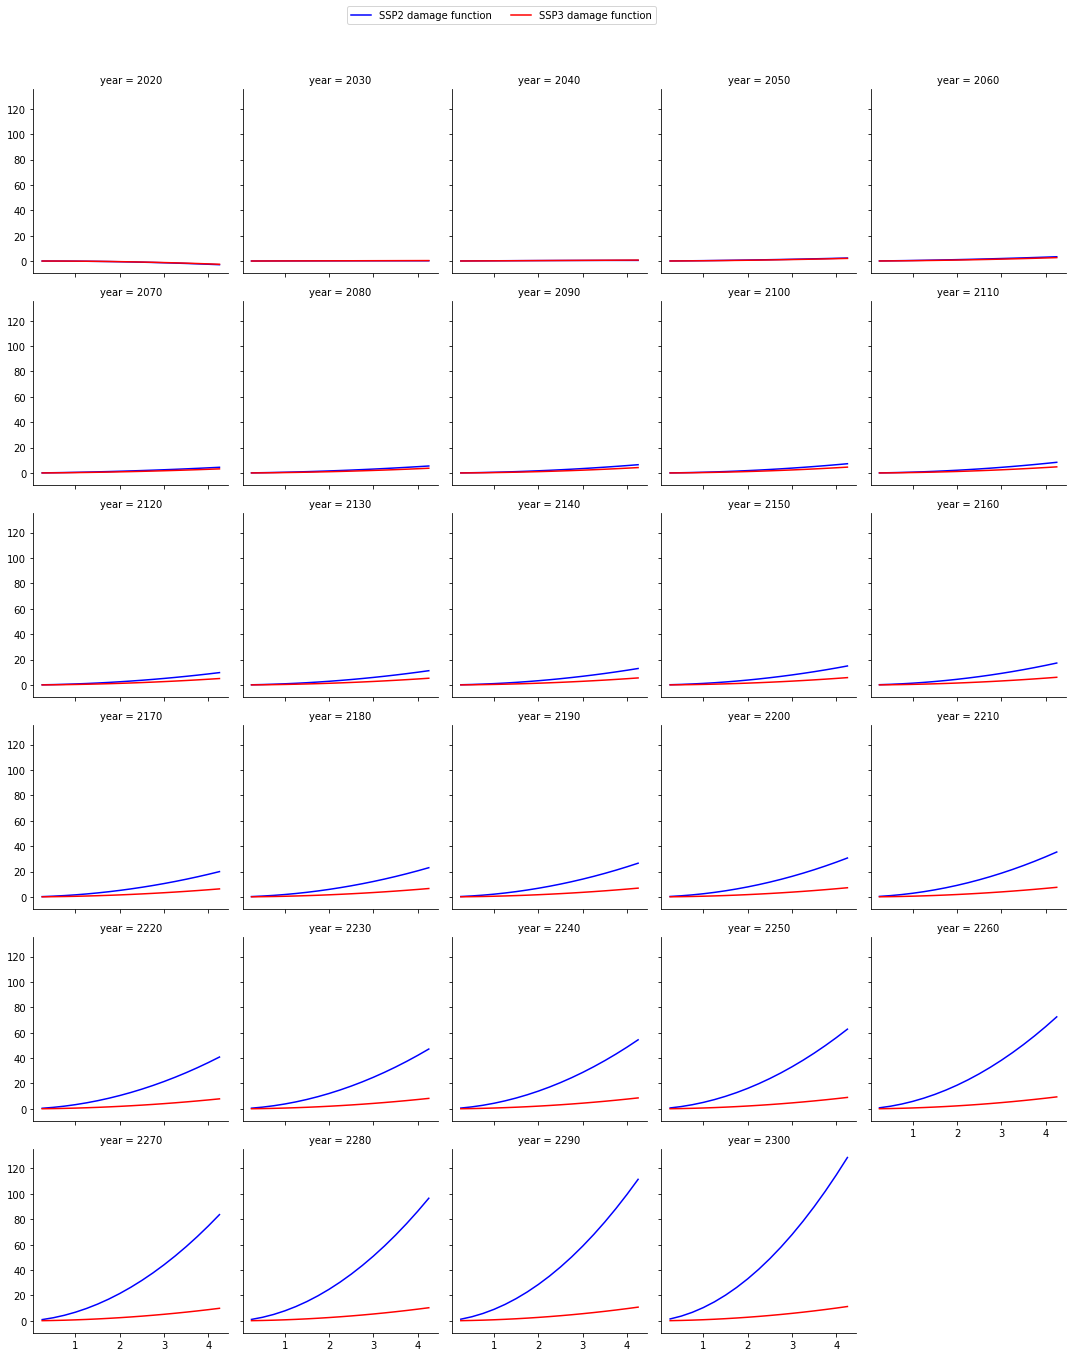

In [16]:
# making the grid plot of non-CE cloud smooth vs non-smooth anomalies
g = sns.FacetGrid(df2, col="year", col_wrap=5, sharey=True)
g.map_dataframe(sns.lineplot, x='temp', y='ssp2_df_T', color = "blue", label="SSP2 damage function").map_dataframe(sns.lineplot, x='temp', y='ssp3_df_T', color = "red", label="SSP3 damage function")
lgd = plt.legend(bbox_to_anchor=(0,7.25), ncol=2)
plt.savefig('/home/nsharma/repos/labor-code-release-2020/output/damage_function_no_cons/dfs.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')